In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/clone_af_dendrograms'

In [2]:

INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/barcodes/btwnClones/"
DONOR = 1

clones_meta = '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/results/clones_summary/feb23_2022/clones_summary.csv'



In [3]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

fig_utils from mplh
here
0.5.6


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
out_f = join(OUTDIR, f"donor{DONOR}")


In [6]:
clones_meta_df = pd.read_csv(clones_meta,index_col=0)
clones_meta_df

,donor,lineage,hypergeom_sig_clusters_inputOnly,hypergeom_min_pval_inputOnly,ncells,fold p_adj,log2_fold,fold_change,dominant_cluster,dominant_cluster_size,# Control Cells in Cluster,# Flt3l Cells in Cluster,# Input Cells in Cluster,input_dominant_cluster,input_dominant_cluster_size,hypergeom_sig_clusters,hypergeom_min_pval,shuffle_sig,-log10(fold p_adj)
1_0,1,0,MPP/CMP/GMP C,0.059634,579.0,2.448594e-05,0.309328,expand,1,81.0,184,266,138,2,56.0,4;5;7,4.824337e-03,True,4.611083
1_1,1,1,MPP/CMP/GMP C;MPP/CMP/GMP D,0.079397,516.0,5.623765e-16,-1.222392,regress,2,74.0,210,105,205,2,72.0,4;5,3.277061e-02,True,15.249973
1_2,1,2,NaN,NaN,488.0,1.679290e-01,-0.213514,no_change,2,61.0,162,163,167,2,54.0,8,6.799951e-03,False,0.774874
1_3,1,3,NaN,NaN,468.0,4.011071e-07,-1.000000,regress,4,82.0,204,119,147,2,52.0,4,5.231332e-08,True,6.396740
1_4,1,4,NaN,NaN,453.0,9.034752e-04,-0.295324,regress,2,69.0,142,135,190,2,67.0,2;4,4.824337e-03,False,3.044084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_44,0,44,NaN,NaN,28.0,3.754341e-03,0.620444,expand,0,10.0,7,18,1,NaN,NaN,0;10,2.048093e-03,False,2.425466
0_47,0,47,NaN,NaN,17.0,1.211990e-02,1.132343,no_change,10,5.0,3,11,1,NaN,NaN,9;10,9.299686e-04,False,1.916501
0_48,0,48,NaN,NaN,12.0,4.681279e-02,1.257874,no_change,0,5.0,2,8,1,NaN,NaN,NaN,NaN,False,1.329635
0_50,0,50,NaN,NaN,11.0,1.000000e+00,-1.157164,no_change,5,3.0,4,3,2,3,2.0,NaN,NaN,False,-0.000000


In [7]:
curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR].set_index("lineage")
curr_clones

,donor,hypergeom_sig_clusters_inputOnly,hypergeom_min_pval_inputOnly,ncells,fold p_adj,log2_fold,fold_change,dominant_cluster,dominant_cluster_size,# Control Cells in Cluster,# Flt3l Cells in Cluster,# Input Cells in Cluster,input_dominant_cluster,input_dominant_cluster_size,hypergeom_sig_clusters,hypergeom_min_pval,shuffle_sig,-log10(fold p_adj)
lineage,,,,,,,,,,,,,,,,,,
0,1,MPP/CMP/GMP C,0.059634,579.0,2.448594e-05,0.309328,expand,1,81.0,184,266,138,2,56.0,4;5;7,4.824337e-03,True,4.611083
1,1,MPP/CMP/GMP C;MPP/CMP/GMP D,0.079397,516.0,5.623765e-16,-1.222392,regress,2,74.0,210,105,205,2,72.0,4;5,3.277061e-02,True,15.249973
2,1,NaN,NaN,488.0,1.679290e-01,-0.213514,no_change,2,61.0,162,163,167,2,54.0,8,6.799951e-03,False,0.774874
3,1,NaN,NaN,468.0,4.011071e-07,-1.000000,regress,4,82.0,204,119,147,2,52.0,4,5.231332e-08,True,6.396740
4,1,NaN,NaN,453.0,9.034752e-04,-0.295324,regress,2,69.0,142,135,190,2,67.0,2;4,4.824337e-03,False,3.044084
5,1,NaN,NaN,453.0,3.788982e-17,0.537474,expand,1,72.0,150,254,49,2,18.0,4;5;9,6.426175e-05,True,16.421478
6,1,NaN,NaN,345.0,4.505356e-20,-1.054270,regress,2,70.0,89,50,211,2,68.0,2;4;11,7.146592e-05,True,19.346271
7,1,neutrophil B,0.059634,336.0,7.937646e-25,-1.008989,regress,2,88.0,69,40,233,2,87.0,2;3;11,0.000000e+00,True,24.100308
8,1,NaN,NaN,331.0,6.408315e-20,0.604543,expand,0,65.0,115,204,13,2,9.0,0;4;6;9,2.516123e-05,True,19.193256


## Load cluster results and plot dendrograms

In [8]:
af_indir = join(INDIR, "sc_af", f"donor{DONOR}")
AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


In [9]:
cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep='\t')#.sort_values(["donor", "lineage"])
curr_labels = cells_meta[cells_meta["donor"]==DONOR]

In [10]:
def calc_mean(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].mean(axis=1)

def calc_median(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].median(axis=1)

In [11]:
from src.utils import utils  as ut
from itertools import combinations


In [12]:
curr_clones, enrich_anno_labels, enrich_anno_lut = ut.get_continuous_colors(curr_clones, col="-log10(fold p_adj)", clr_key=2)
curr_clones

,donor,hypergeom_sig_clusters_inputOnly,hypergeom_min_pval_inputOnly,ncells,fold p_adj,log2_fold,fold_change,dominant_cluster,dominant_cluster_size,# Control Cells in Cluster,# Flt3l Cells in Cluster,# Input Cells in Cluster,input_dominant_cluster,input_dominant_cluster_size,hypergeom_sig_clusters,hypergeom_min_pval,shuffle_sig,-log10(fold p_adj),-log10(fold p_adj)_map
lineage,,,,,,,,,,,,,,,,,,,
0,1,MPP/CMP/GMP C,0.059634,579.0,2.448594e-05,0.309328,expand,1,81.0,184,266,138,2,56.0,4;5;7,4.824337e-03,True,4.611083,"[0.6630461242577931, 0.6137868612778814, 0.425..."
1,1,MPP/CMP/GMP C;MPP/CMP/GMP D,0.079397,516.0,5.623765e-16,-1.222392,regress,2,74.0,210,105,205,2,72.0,4;5,3.277061e-02,True,15.249973,"[0.8105756195944189, 0.7956220262364831, 0.652..."
2,1,NaN,NaN,488.0,1.679290e-01,-0.213514,no_change,2,61.0,162,163,167,2,54.0,8,6.799951e-03,False,0.774874,"[0.5062064398093767, 0.4271329619203797, 0.250..."
3,1,NaN,NaN,468.0,4.011071e-07,-1.000000,regress,4,82.0,204,119,147,2,52.0,4,5.231332e-08,True,6.396740,"[0.7125352213319313, 0.6753256293917403, 0.495..."
4,1,NaN,NaN,453.0,9.034752e-04,-0.295324,regress,2,69.0,142,135,190,2,67.0,2;4,4.824337e-03,False,3.044084,"[0.6295076217809991, 0.5724444473642508, 0.382..."
5,1,NaN,NaN,453.0,3.788982e-17,0.537474,expand,1,72.0,150,254,49,2,18.0,4;5;9,6.426175e-05,True,16.421478,"[0.8270344820692316, 0.815186416249202, 0.6804..."
6,1,NaN,NaN,345.0,4.505356e-20,-1.054270,regress,2,70.0,89,50,211,2,68.0,2;4;11,7.146592e-05,True,19.346271,"[0.860241439983147, 0.8538052342982236, 0.7392..."
7,1,neutrophil B,0.059634,336.0,7.937646e-25,-1.008989,regress,2,88.0,69,40,233,2,87.0,2;3;11,0.000000e+00,True,24.100308,"[0.8939736847998578, 0.8916757903255957, 0.800..."
8,1,NaN,NaN,331.0,6.408315e-20,0.604543,expand,0,65.0,115,204,13,2,9.0,0;4;6;9,2.516123e-05,True,19.193256,"[0.8435827804806202, 0.834584257071235, 0.7095..."


In [13]:
curr_clones.columns

Index(['donor', 'hypergeom_sig_clusters_inputOnly',
       'hypergeom_min_pval_inputOnly', 'ncells', 'fold p_adj', 'log2_fold',
       'fold_change', 'dominant_cluster', 'dominant_cluster_size',
       '# Control Cells in Cluster', '# Flt3l Cells in Cluster',
       '# Input Cells in Cluster', 'input_dominant_cluster',
       'input_dominant_cluster_size', 'hypergeom_sig_clusters',
       'hypergeom_min_pval', 'shuffle_sig', '-log10(fold p_adj)',
       '-log10(fold p_adj)_map'],
      dtype='object')

In [14]:
curr_clones, fold_anno_labels, fold_anno_lut = ut.get_continuous_colors(curr_clones, col="log2_fold", clr_key=1,
                                                                        clr_type="divergent")
curr_clones

,donor,hypergeom_sig_clusters_inputOnly,hypergeom_min_pval_inputOnly,ncells,fold p_adj,log2_fold,fold_change,dominant_cluster,dominant_cluster_size,# Control Cells in Cluster,# Flt3l Cells in Cluster,# Input Cells in Cluster,input_dominant_cluster,input_dominant_cluster_size,hypergeom_sig_clusters,hypergeom_min_pval,shuffle_sig,-log10(fold p_adj),-log10(fold p_adj)_map,log2_fold_map
lineage,,,,,,,,,,,,,,,,,,,,
0,1,MPP/CMP/GMP C,0.059634,579.0,2.448594e-05,0.309328,expand,1,81.0,184,266,138,2,56.0,4;5;7,4.824337e-03,True,4.611083,"[0.6630461242577931, 0.6137868612778814, 0.425...","(0.9271253627939503, 0.770646071789166, 0.7819..."
1,1,MPP/CMP/GMP C;MPP/CMP/GMP D,0.079397,516.0,5.623765e-16,-1.222392,regress,2,74.0,210,105,205,2,72.0,4;5,3.277061e-02,True,15.249973,"[0.8105756195944189, 0.7956220262364831, 0.652...","(0.32636592773885387, 0.5339294023312118, 0.68..."
2,1,NaN,NaN,488.0,1.679290e-01,-0.213514,no_change,2,61.0,162,163,167,2,54.0,8,6.799951e-03,False,0.774874,"[0.5062064398093767, 0.4271329619203797, 0.250...","(0.7753041543286692, 0.8343313950998299, 0.879..."
3,1,NaN,NaN,468.0,4.011071e-07,-1.000000,regress,4,82.0,204,119,147,2,52.0,4,5.231332e-08,True,6.396740,"[0.7125352213319313, 0.6753256293917403, 0.495...","(0.43927518862851017, 0.6094813713201988, 0.73..."
4,1,NaN,NaN,453.0,9.034752e-04,-0.295324,regress,2,69.0,142,135,190,2,67.0,2;4,4.824337e-03,False,3.044084,"[0.6295076217809991, 0.5724444473642508, 0.382...","(0.6677715249099491, 0.7623771389198423, 0.833..."
5,1,NaN,NaN,453.0,3.788982e-17,0.537474,expand,1,72.0,150,254,49,2,18.0,4;5;9,6.426175e-05,True,16.421478,"[0.8270344820692316, 0.815186416249202, 0.6804...","(0.9068152919027175, 0.6192539015920233, 0.640..."
6,1,NaN,NaN,345.0,4.505356e-20,-1.054270,regress,2,70.0,89,50,211,2,68.0,2;4;11,7.146592e-05,True,19.346271,"[0.860241439983147, 0.8538052342982236, 0.7392...","(0.36400234803540593, 0.5591133919942074, 0.70..."
7,1,neutrophil B,0.059634,336.0,7.937646e-25,-1.008989,regress,2,88.0,69,40,233,2,87.0,2;3;11,0.000000e+00,True,24.100308,"[0.8939736847998578, 0.8916757903255957, 0.800...","(0.40163876833195805, 0.584297381657203, 0.719..."
8,1,NaN,NaN,331.0,6.408315e-20,0.604543,expand,0,65.0,115,204,13,2,9.0,0;4;6;9,2.516123e-05,True,19.193256,"[0.8435827804806202, 0.834584257071235, 0.7095...","(0.8959095007984337, 0.5379616504799436, 0.564..."


In [15]:
sizes = pd.DataFrame(curr_labels.groupby(["lineage"]).size()).rename({0:"size"},axis=1)
sizes_conds = pd.DataFrame(curr_labels.groupby(["lineage","condition"]).size()).reset_index().rename({0:"size"},axis=1)
sizes = pd.concat((sizes,sizes_conds.pivot(index="lineage", columns="condition", values="size")), axis=1).fillna(0)
sizes, sz_anno_labels, sz_anno_lut = ut.get_continuous_colors(sizes, col="size", clr_key=1)
curr_clones = pd.concat((sizes,curr_clones),axis=1)
curr_clones

,size,Control,Flt3l,Input,size_map,donor,hypergeom_sig_clusters_inputOnly,hypergeom_min_pval_inputOnly,ncells,fold p_adj,...,# Flt3l Cells in Cluster,# Input Cells in Cluster,input_dominant_cluster,input_dominant_cluster_size,hypergeom_sig_clusters,hypergeom_min_pval,shuffle_sig,-log10(fold p_adj),-log10(fold p_adj)_map,log2_fold_map
lineage,,,,,,,,,,,,,,,,,,,,,
0,585,183.0,265.0,137.0,"[0.9060502442435664, 0.8870126653211716, 0.970...",1,MPP/CMP/GMP C,0.059634,579.0,2.448594e-05,...,266,138,2,56.0,4;5;7,4.824337e-03,True,4.611083,"[0.6630461242577931, 0.6137868612778814, 0.425...","(0.9271253627939503, 0.770646071789166, 0.7819..."
1,517,209.0,104.0,204.0,"[0.8862400338905383, 0.8652431083959663, 0.963...",1,MPP/CMP/GMP C;MPP/CMP/GMP D,0.079397,516.0,5.623765e-16,...,105,205,2,72.0,4;5,3.277061e-02,True,15.249973,"[0.8105756195944189, 0.7956220262364831, 0.652...","(0.32636592773885387, 0.5339294023312118, 0.68..."
2,489,161.0,162.0,166.0,"[0.8661364348127403, 0.8437297749047792, 0.955...",1,NaN,NaN,488.0,1.679290e-01,...,163,167,2,54.0,8,6.799951e-03,False,0.774874,"[0.5062064398093767, 0.4271329619203797, 0.250...","(0.7753041543286692, 0.8343313950998299, 0.879..."
3,467,203.0,118.0,146.0,"[0.845759689523172, 0.822463886000064, 0.94687...",1,NaN,NaN,468.0,4.011071e-07,...,119,147,2,52.0,4,5.231332e-08,True,6.396740,"[0.7125352213319313, 0.6753256293917403, 0.495...","(0.43927518862851017, 0.6094813713201988, 0.73..."
4,464,141.0,134.0,189.0,"[0.8209756852601883, 0.7972588646063989, 0.935...",1,NaN,NaN,453.0,9.034752e-04,...,135,190,2,67.0,2;4,4.824337e-03,False,3.044084,"[0.6295076217809991, 0.5724444473642508, 0.382...","(0.6677715249099491, 0.7623771389198423, 0.833..."
5,450,149.0,253.0,48.0,"[0.8000697308764468, 0.7765057218447896, 0.925...",1,NaN,NaN,453.0,3.788982e-17,...,254,49,2,18.0,4;5;9,6.426175e-05,True,16.421478,"[0.8270344820692316, 0.815186416249202, 0.6804...","(0.9068152919027175, 0.6192539015920233, 0.640..."
6,347,88.0,49.0,210.0,"[0.7789560021962667, 0.7559709492275747, 0.915...",1,NaN,NaN,345.0,4.505356e-20,...,50,211,2,68.0,2;4;11,7.146592e-05,True,19.346271,"[0.860241439983147, 0.8538052342982236, 0.7392...","(0.36400234803540593, 0.5591133919942074, 0.70..."
7,339,68.0,39.0,232.0,"[0.7576550766912712, 0.7356451715297765, 0.904...",1,neutrophil B,0.059634,336.0,7.937646e-25,...,40,233,2,87.0,2;3;11,0.000000e+00,True,24.100308,"[0.8939736847998578, 0.8916757903255957, 0.800...","(0.40163876833195805, 0.584297381657203, 0.719..."
8,329,114.0,203.0,12.0,"[0.7361875847796528, 0.7155188841264261, 0.892...",1,NaN,NaN,331.0,6.408315e-20,...,204,13,2,9.0,0;4;6;9,2.516123e-05,True,19.193256,"[0.8435827804806202, 0.834584257071235, 0.7095...","(0.8959095007984337, 0.5379616504799436, 0.564..."


In [16]:
curr_clones[["-log10(fold p_adj)_map", "size_map","log2_fold_map"]]

,-log10(fold p_adj)_map,size_map,log2_fold_map
lineage,,,
0,"[0.6630461242577931, 0.6137868612778814, 0.425...","[0.9060502442435664, 0.8870126653211716, 0.970...","(0.9271253627939503, 0.770646071789166, 0.7819..."
1,"[0.8105756195944189, 0.7956220262364831, 0.652...","[0.8862400338905383, 0.8652431083959663, 0.963...","(0.32636592773885387, 0.5339294023312118, 0.68..."
2,"[0.5062064398093767, 0.4271329619203797, 0.250...","[0.8661364348127403, 0.8437297749047792, 0.955...","(0.7753041543286692, 0.8343313950998299, 0.879..."
3,"[0.7125352213319313, 0.6753256293917403, 0.495...","[0.845759689523172, 0.822463886000064, 0.94687...","(0.43927518862851017, 0.6094813713201988, 0.73..."
4,"[0.6295076217809991, 0.5724444473642508, 0.382...","[0.8209756852601883, 0.7972588646063989, 0.935...","(0.6677715249099491, 0.7623771389198423, 0.833..."
5,"[0.8270344820692316, 0.815186416249202, 0.6804...","[0.8000697308764468, 0.7765057218447896, 0.925...","(0.9068152919027175, 0.6192539015920233, 0.640..."
6,"[0.860241439983147, 0.8538052342982236, 0.7392...","[0.7789560021962667, 0.7559709492275747, 0.915...","(0.36400234803540593, 0.5591133919942074, 0.70..."
7,"[0.8939736847998578, 0.8916757903255957, 0.800...","[0.7576550766912712, 0.7356451715297765, 0.904...","(0.40163876833195805, 0.584297381657203, 0.719..."
8,"[0.8435827804806202, 0.834584257071235, 0.7095...","[0.7361875847796528, 0.7155188841264261, 0.892...","(0.8959095007984337, 0.5379616504799436, 0.564..."


# Barcodes not grouping by condition

In [17]:
mean_af = curr_labels.groupby(["lineage"]).apply(calc_mean, af=AF_df)
anno = mean_af.reset_index()[["lineage"]]

#mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=nlog2(DP_df))
mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=np.log2(DP_df+1))
anno_dp = mean_dp.reset_index()[["lineage"]]
mean_dp = mean_dp.reset_index(drop=True)

na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

if not (na_mean_af.shape[0] == 0):
    print('na shape', na_mean_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index)})), ignore_index=True)
    na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
    na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = mean_af.reset_index(drop=True)
    na_dp_concat = mean_dp
     
mean_af  

Variant,10397G,10463C,10559G,10589A,11251G,11453A,11719A,11761T,11812G,13188T,...,750G,7598A,827G,8292A,8461T,8697A,8743A,8860G,930A,9899C
lineage,,,,,,,,,,,,,,,,,,,,,
0,0.007604,0.952683,0.984054,0.004433,0.981657,0.000700,0.970113,0.027892,0.972729,0.022162,...,0.998054,0.002430,0.027287,0.024065,0.005240,0.970386,0.000190,0.998131,0.983810,0.000076
1,0.000425,0.991122,0.995862,0.000682,0.993068,0.000030,0.991790,0.000617,0.994070,0.000218,...,0.999622,0.000654,0.002007,0.001196,0.000000,0.992768,0.000000,0.997210,0.992952,0.988859
2,0.008484,0.963289,0.985653,0.006582,0.980756,0.000314,0.984966,0.008527,0.978805,0.006970,...,0.995502,0.005379,0.006228,0.009052,0.006380,0.977896,0.000000,0.995561,0.981753,0.973633
3,0.000532,0.993505,0.996060,0.000380,0.989743,0.000184,0.992382,0.000556,0.992396,0.000071,...,0.991162,0.001067,0.000959,0.000538,0.000000,0.990921,0.000095,0.999537,0.993434,0.986549
4,0.002775,0.982146,0.991468,0.004124,0.987301,0.000100,0.991893,0.003178,0.994641,0.003910,...,0.999251,0.004271,0.002157,0.005250,0.002865,0.990618,0.000072,0.997056,0.988333,0.437535
5,0.006002,0.931642,0.937979,0.002455,0.962315,0.000317,0.982855,0.003703,0.972138,0.011562,...,0.983686,0.004918,0.003955,0.006876,0.005285,0.944954,0.000000,0.993082,0.960382,0.000000
6,0.000641,0.996170,0.996737,0.000677,0.995544,0.000194,0.994182,0.000800,0.997063,0.000130,...,0.999543,0.000698,0.001377,0.001182,0.000017,0.994743,0.000046,0.999727,0.994609,0.990745
7,0.002272,0.996118,0.992753,0.001111,0.995090,0.000126,0.994388,0.002139,0.995405,0.001250,...,0.999532,0.002981,0.001835,0.001164,0.002548,0.993329,0.000241,0.999470,0.997441,0.973397
8,0.007287,0.744855,0.853075,0.053032,0.933007,0.000000,0.959379,0.004670,0.971566,0.006133,...,0.987335,0.006140,0.039809,0.012559,0.009684,0.911090,0.000000,0.984599,0.952741,0.935461


In [18]:
# mean_af.to_csv(out_f+".initInds.mean.csv")

# curr_clones[["donor","size", "log2_fold","-log10(fold p_adj)", "shuffle_sig", 
#              "ncells"]+ list(curr_labels["condition"].unique())].to_csv(out_f+".initInds.indsMeta.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


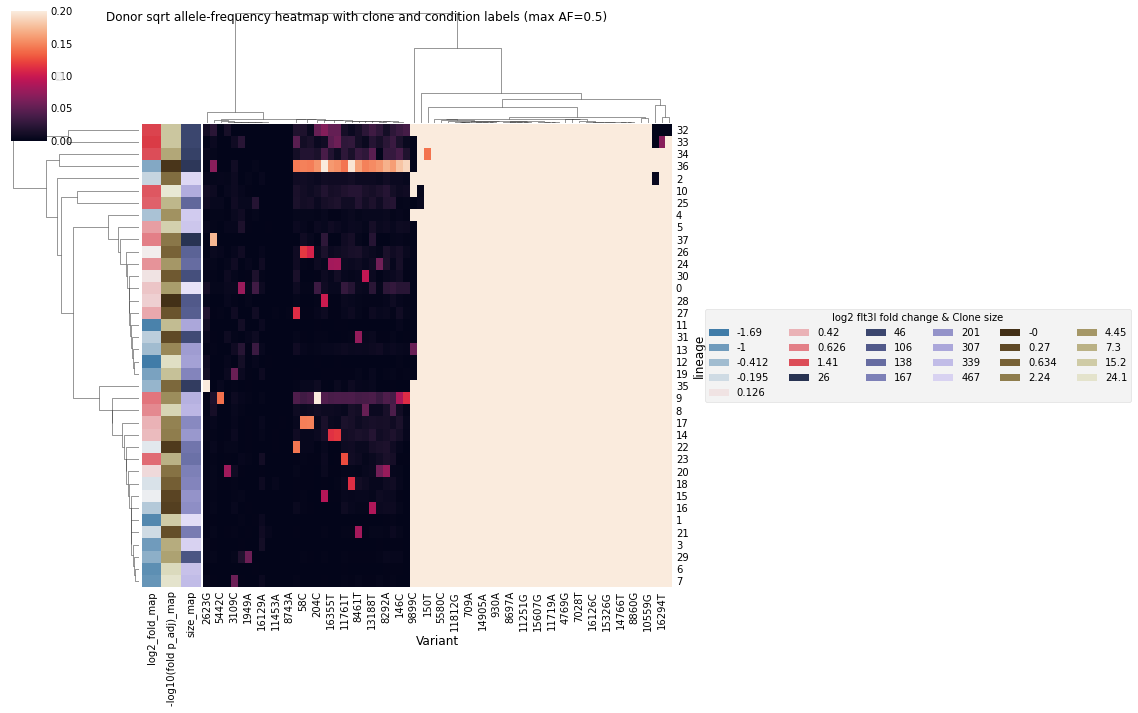

In [19]:
%matplotlib inline
## Max 0.2

g = sns.clustermap(mean_af, row_colors=curr_clones[["log2_fold_map","-log10(fold p_adj)_map", "size_map"]],
                   row_cluster=True, col_cluster=True, vmax=0.2, vmin=0)
inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
mean_af.iloc[inds,cols].to_csv(out_f+"mean.csv")


plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
leg2 = ut.plot_continuous_legend(g, fold_anno_labels,fold_anno_lut,n_labs=8,title="log2 fold")
leg1 = ut.plot_continuous_legend(g, sz_anno_labels,sz_anno_lut, n_labs=8, title="clone size",loc='lower right')
leg3 = ut.plot_continuous_legend(g, enrich_anno_labels,enrich_anno_lut,n_labs=8,title="-log10 clone p-value enrichment")

g.ax_heatmap.legend(title="log2 flt3l fold change & Clone size",bbox_to_anchor=(2, 0.5), 
                    ncol=6, loc="center right", borderaxespad=1)
#g.ax_heatmap.add_artist(leg1)
plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
fu.helper_save(out_f+"withEnrichmentFoldChange.NoCondition.clust.max2.AF.png",to_pdf=False)


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


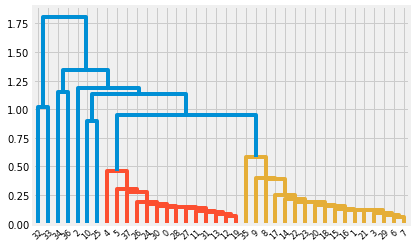

In [20]:
import scipy
from collections import defaultdict
#mean_af_clust = mean_af.iloc[inds,cols]
curr_clones = curr_clones.iloc[inds]

den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_row.linkage,
                                         labels = mean_af.index,
                                         color_threshold=0.60)  

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = {}
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

clusters = get_cluster_classes(den)

cluster = []
for i in mean_af.index:
    included=False
    for j in clusters.keys():
        if i in clusters[j]:
            cluster.append(j)
            included=True
    if not included:
        cluster.append(None)

curr_clones.loc[mean_af.index,"den_clust"] = cluster

## Group clones using dendrogram and run stats on size differences in the groups

### Run ranksums on clone size btwn debdrogram clusters

In [21]:
size_pvals = []
for pair in combinations(curr_clones["den_clust"].unique(),2):
    print(pair)
    stat, p_val = scipy.stats.ranksums(curr_clones.loc[curr_clones["den_clust"]==pair[0], "size"].values, 
                         y=curr_clones.loc[curr_clones["den_clust"]==pair[1], "size"].values, 
                         alternative='two-sided')

    size_pvals.append(f"{pair[0]}, {pair[1]}, {str(p_val)}")
    
with open(out_f + "dendrogram_pvals.txt", "w") as f:
    #for l in size_pvals:
    f.write("\n".join(size_pvals))


('C0', 'C1')
('C0', 'C2')
('C1', 'C2')


## Add dendro IDs to meta

In [22]:
curr_clones, den_anno_labels, den_anno_lut = ut.get_continuous_colors(curr_clones, col="den_clust", clr_key=1,
                                                                        clr_type="categorical")

curr_clones.to_csv(out_f+".dendro.csv")
curr_clones



/mnt/md0/isshamie/Projects/Mito_Trace/src/utils/utils.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{col}_map"] = df[col].apply(lambda x: anno_colors.loc[str(x)])


,size,Control,Flt3l,Input,size_map,donor,hypergeom_sig_clusters_inputOnly,hypergeom_min_pval_inputOnly,ncells,fold p_adj,...,input_dominant_cluster,input_dominant_cluster_size,hypergeom_sig_clusters,hypergeom_min_pval,shuffle_sig,-log10(fold p_adj),-log10(fold p_adj)_map,log2_fold_map,den_clust,den_clust_map
lineage,,,,,,,,,,,,,,,,,,,,,
32,46,4.0,42.0,0.0,"[0.23223947251649008, 0.27323359495347643, 0.4...",1,NaN,NaN,53.0,6.656522e-13,...,NaN,NaN,9;10,1.912100e-03,True,12.176753,"[0.7941853086676358, 0.7759014850957404, 0.624...","(0.8590504832550853, 0.2632128971592031, 0.307...",C0,"(0.4, 0.7607843137254902, 0.6470588235294118)"
33,46,3.0,42.0,1.0,"[0.23223947251649008, 0.27323359495347643, 0.4...",1,NaN,NaN,57.0,6.656522e-13,...,2,2.0,9,5.504225e-05,True,12.176753,"[0.7941853086676358, 0.7759014850957404, 0.624...","(0.8545371341681446, 0.22957019267094914, 0.27...",C0,"(0.4, 0.7607843137254902, 0.6470588235294118)"
34,39,9.0,30.0,0.0,"[0.21311962371298027, 0.254759166849083, 0.405...",1,NaN,NaN,46.0,3.372439e-06,...,NaN,NaN,6;9;10,1.283519e-04,True,5.472056,"[0.6961212231518454, 0.6548905533447682, 0.471...","(0.8643160571898493, 0.302462719062166, 0.3443...",C0,"(0.4, 0.7607843137254902, 0.6470588235294118)"
36,30,15.0,10.0,5.0,"[0.1759402948013748, 0.21758406872291514, 0.34...",1,NaN,NaN,41.0,8.969021e-01,...,12,3.0,10;12,4.635708e-02,False,0.047255,"[0.2861475540254932, 0.20801896672198758, 0.10...","(0.5145480292216144, 0.65984935064619, 0.76768...",C0,"(0.4, 0.7607843137254902, 0.6470588235294118)"
2,489,161.0,162.0,166.0,"[0.8661364348127403, 0.8437297749047792, 0.955...",1,NaN,NaN,488.0,1.679290e-01,...,2,54.0,8,6.799951e-03,False,0.774874,"[0.5062064398093767, 0.4271329619203797, 0.250...","(0.7753041543286692, 0.8343313950998299, 0.879...",C0,"(0.4, 0.7607843137254902, 0.6470588235294118)"
10,312,78.0,227.0,7.0,"[0.6928356261044345, 0.6758261443789129, 0.867...",1,NaN,NaN,308.0,6.534572e-38,...,2,4.0,0;1;4;6;9;10,4.616880e-09,True,37.184783,"[0.9110892313159192, 0.9103052060346608, 0.832...","(0.8695816311246134, 0.34171254096512893, 0.38...",C0,"(0.4, 0.7607843137254902, 0.6470588235294118)"
25,129,39.0,81.0,9.0,"[0.3784544292113493, 0.40513158880609695, 0.60...",1,NaN,NaN,141.0,9.432807e-09,...,2;3,5.0,1,2.241015e-02,True,8.025359,"[0.7452176686689442, 0.7159080786800612, 0.544...","(0.8748472050593774, 0.3809623628680921, 0.417...",C0,"(0.4, 0.7607843137254902, 0.6470588235294118)"
4,464,141.0,134.0,189.0,"[0.8209756852601883, 0.7972588646063989, 0.935...",1,NaN,NaN,453.0,9.034752e-04,...,2,67.0,2;4,4.824337e-03,False,3.044084,"[0.6295076217809991, 0.5724444473642508, 0.382...","(0.6677715249099491, 0.7623771389198423, 0.833...",C1,"(0.9882352941176471, 0.5529411764705883, 0.384..."
5,450,149.0,253.0,48.0,"[0.8000697308764468, 0.7765057218447896, 0.925...",1,NaN,NaN,453.0,3.788982e-17,...,2,18.0,4;5;9,6.426175e-05,True,16.421478,"[0.8270344820692316, 0.815186416249202, 0.6804...","(0.9068152919027175, 0.6192539015920233, 0.640...",C1,"(0.9882352941176471, 0.5529411764705883, 0.384..."


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


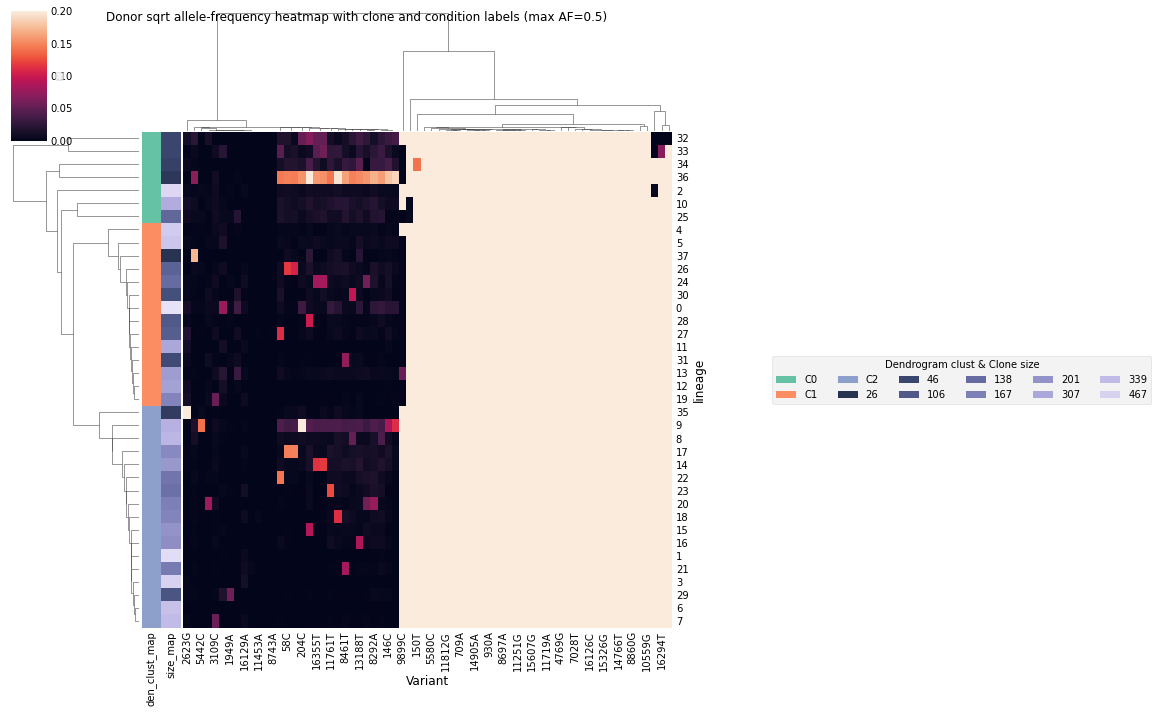

In [23]:
%matplotlib inline

# ch.plot_cluster(mean_af, row_meta=curr_clones[["den_clust"]], vmax=0.2, vmin=0)
# fu.helper_save(out_f+"withEnrichmentFoldChange.DENDROGRAM.NoCondition.clust.max2.AF.png",to_pdf=False)


## Max 0.2

g = sns.clustermap(mean_af, row_colors=curr_clones[["den_clust_map","size_map"]],
                   row_cluster=True, col_cluster=True, vmax=0.2, vmin=0)
inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
mean_af.iloc[inds,cols].to_csv(out_f+"mean.csv")

plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.suptitle("Donor allele-frequency heatmap with clone and condition labels (max AF=0.2)")
leg2 = ut.plot_continuous_legend(g, den_anno_labels,den_anno_lut,n_labs=8,title="log2 fold")
leg1 = ut.plot_continuous_legend(g, sz_anno_labels,sz_anno_lut, n_labs=8, title="clone size",loc='lower right')

g.ax_heatmap.legend(title="Dendrogram clust & Clone size",bbox_to_anchor=(2, 0.5), 
                    ncol=6, loc="center right", borderaxespad=1)
#g.ax_heatmap.add_artist(leg1)
plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
#fu.helper_save(out_f+"withEnrichmentFoldChange.NoCondition.clust.max2.AF.png",to_pdf=False)
fu.helper_save(out_f+"withEnrichmentFoldChange.DENDROGRAM.NoCondition.clust.max2.AF.png",to_pdf=False)
